<a href="https://colab.research.google.com/github/cluainin/BigDataProject/blob/main/BigDataProject300M09_Stn23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Setup the Spark environment in Google Collab

In [ ]:
# Install Java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# Download and extract Spark
!wget -q https://archive.apache.org/dist/spark/spark-3.2.0/spark-3.2.0-bin-hadoop3.2.tgz
!tar xf spark-3.2.0-bin-hadoop3.2.tgz
!pip install -q findspark

# Set up environment variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.0-bin-hadoop3.2"
os.environ["PYSPARK_PYTHON"] = "python3"

# Find and initialize Spark
import findspark
findspark.init()

# Start a Spark session
from pyspark.sql import SparkSession

spark = SparkSession.builder \
	    .master("local[*]") \
	    .appName("Spark_Colab") \
	    .getOrCreate()

# Test Spark session
spark.range(5).show()

+---+
| id|
+---+
|  0|
|  1|
|  2|
|  3|
|  4|
+---+



Setup a Spark Session

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder\
	  .master("local")\
	  .appName("colab")\
	  .config('spark.ui.port', '4050')\
	  .getOrCreate()

spark

Import the dataset ("CSV file from database table)

In [ ]:
# Read CSV file into DataFrame
from google.colab import files

# Upload CSV file
uploaded = files.upload()

# Print uploaded file name(s)
for filename in uploaded.keys():
    print(f"Uploaded file: {filename}")

Saving ProdLine300M09Stn23-month.csv to ProdLine300M09Stn23-month.csv
Uploaded file: ProdLine300M09Stn23-month.csv


Create a dataframe showing the data content

In [ ]:
# Install the pandas library

import pandas as pd

df = pd.read_csv('ProdLine300M09Stn23-month.csv')

# Display the dataframe

print(df)

            ID                    DateStamp  ProductProg  PID  \
0      1510073  2023-01-31 23:59:47.5500000        20295   27   
1      1510071  2023-01-31 23:58:19.8370000        20295   13   
2      1510072  2023-01-31 23:58:19.8370000        20295   13   
3      1510069  2023-01-31 23:56:52.0100000        20295    9   
4      1510070  2023-01-31 23:56:52.0100000        20295    9   
...        ...                          ...          ...  ...   
38779  1471294  2023-01-03 09:23:20.7470000            0   17   
38780  1471293  2023-01-03 09:22:27.5200000            0   18   
38781  1471292  2023-01-03 09:21:48.5500000            0   30   
38782  1471291  2023-01-03 09:21:16.2270000            0   34   
38783  1471290  2023-01-03 09:04:12.8430000            0    5   

       DeltaVoltage_L_H1  DeltaVoltage_R_H1  MidPosn_L_H1  MidPosn_R_H1  \
0                    435                436           254           256   
1                      0                  0             0            


Check the datatype of each column

In [ ]:
#Check the datatype of each column

column_datatypes = df.dtypes

#Print the data type for each column

print(column_datatypes)

ID                                     int64
DateStamp                             object
ProductProg                            int64
PID                                    int64
DeltaVoltage_L_H1                      int64
                                       ...  
Delta_V_Pot_Too_Small_Rejects_R_H4     int64
Delta_V_Pot_Too_Small_Rejects_R_H5     int64
Delta_V_Pot_Too_Small_Rejects_R_H6     int64
Delta_V_Pot_Too_Small_Rejects_R_H7     int64
Delta_V_Pot_Too_Small_Rejects_R_H8     int64
Length: 457, dtype: object


List all the columns in the dataframe

In [ ]:

column_list = df.columns.tolist()
print("Columns in the DataFrame:")
print(column_list)

Columns in the DataFrame:
['ID', 'DateStamp', 'ProductProg', 'PID', 'DeltaVoltage_L_H1', 'DeltaVoltage_R_H1', 'MidPosn_L_H1', 'MidPosn_R_H1', 'PotPosn_P1_L_H1', 'PotPosn_P2_L_H1', 'PotPosn_P1_R_H1', 'PotPosn_P2_R_H1', 'Avg_Inom_L_H1', 'Avg_Inom_R_H1', 'Avg_Islip_L_H1', 'Avg_Islip_R_H1', 'PotContactOK_L_H1', 'PotContactOK_R_H1', 'Fail_Spike_L_H1', 'Fail_Spike_R_H1', 'Fail_Timeout_L_H1', 'Fail_Timeout_R_H1', 'Fail_DeltaVTooSmall_L_H1', 'Fail_DeltaVTooSmall_R_H1', 'Fail_PotVTooBig_L_H1', 'Fail_PotVTooBig_R_H1', 'Fail_PotVTooSmall_L_H1', 'Fail_PotVTooSmall_R_H1', 'Fail_No_Islip_L_H1', 'Fail_No_Islip_R_H1', 'Fail_MidPosn_L_H1', 'Fail_MidPosn_R_H1', 'Fail_0V_OnPot_L_H1', 'Fail_0V_OnPot_R_H1', 'Fail_PotCntctCylNotDwn_H1', 'Fail_MotorCntctCylNotDwn_H1', 'Fail_MotorContact_H1', 'Fail_L_H1', 'Fail_R_H1', 'Reject_H1', 'DeltaVoltage_L_H2', 'DeltaVoltage_R_H2', 'MidPosn_L_H2', 'MidPosn_R_H2', 'PotPosn_P1_L_H2', 'PotPosn_P2_L_H2', 'PotPosn_P1_R_H2', 'PotPosn_P2_R_H2', 'Avg_Inom_L_H2', 'Avg_Inom_R_H2

DateStamp is an object data type and will be changed to datetime format

Change each of the boolean data types to 0 - False, 1 - True

In [ ]:
#list all boolean columns

boolean_columns = df.select_dtypes(include='bool').columns

#print columns with boolean data type

print("Columns with boolean data type:")

for col in boolean_columns:
  print(col)

Columns with boolean data type:
PotContactOK_L_H1
PotContactOK_R_H1
Fail_Spike_L_H1
Fail_Spike_R_H1
Fail_Timeout_L_H1
Fail_Timeout_R_H1
Fail_DeltaVTooSmall_L_H1
Fail_DeltaVTooSmall_R_H1
Fail_PotVTooBig_L_H1
Fail_PotVTooBig_R_H1
Fail_PotVTooSmall_L_H1
Fail_PotVTooSmall_R_H1
Fail_No_Islip_L_H1
Fail_No_Islip_R_H1
Fail_MidPosn_L_H1
Fail_MidPosn_R_H1
Fail_0V_OnPot_L_H1
Fail_0V_OnPot_R_H1
Fail_PotCntctCylNotDwn_H1
Fail_MotorCntctCylNotDwn_H1
Fail_MotorContact_H1
Fail_L_H1
Fail_R_H1
Reject_H1
PotContactOK_L_H2
PotContactOK_R_H2
Fail_Spike_L_H2
Fail_Spike_R_H2
Fail_Timeout_L_H2
Fail_Timeout_R_H2
Fail_DeltaVTooSmall_L_H2
Fail_DeltaVTooSmall_R_H2
Fail_PotVTooBig_L_H2
Fail_PotVTooBig_R_H2
Fail_PotVTooSmall_L_H2
Fail_PotVTooSmall_R_H2
Fail_No_Islip_L_H2
Fail_No_Islip_R_H2
Fail_MidPosn_L_H2
Fail_MidPosn_R_H2
Fail_0V_OnPot_L_H2
Fail_0V_OnPot_R_H2
Fail_PotCntctCylNotDwn_H2
Fail_MotorCntctCylNotDwn_H2
Fail_MotorContact_H2
Fail_L_H2
Fail_R_H2
Reject_H2
PotContactOK_L_H3
PotContactOK_R_H3
Fail_Spike_L_H

In [ ]:
#convert boolean data type to int

df[boolean_columns] = df[boolean_columns].astype(int)

print

#print dataframe after conversion

print(df)

            ID                    DateStamp  ProductProg  PID  \
0      1510073  2023-01-31 23:59:47.5500000        20295   27   
1      1510071  2023-01-31 23:58:19.8370000        20295   13   
2      1510072  2023-01-31 23:58:19.8370000        20295   13   
3      1510069  2023-01-31 23:56:52.0100000        20295    9   
4      1510070  2023-01-31 23:56:52.0100000        20295    9   
...        ...                          ...          ...  ...   
38779  1471294  2023-01-03 09:23:20.7470000            0   17   
38780  1471293  2023-01-03 09:22:27.5200000            0   18   
38781  1471292  2023-01-03 09:21:48.5500000            0   30   
38782  1471291  2023-01-03 09:21:16.2270000            0   34   
38783  1471290  2023-01-03 09:04:12.8430000            0    5   

       DeltaVoltage_L_H1  DeltaVoltage_R_H1  MidPosn_L_H1  MidPosn_R_H1  \
0                    435                436           254           256   
1                      0                  0             0            

Check to make sure no boolean data type columns remain in dataframe

In [ ]:
#list all boolean columns after convert complete

boolean_columns = df.select_dtypes(include='bool').columns

#print columns with boolean data type

print("Columns with boolean data type:")

for col in boolean_columns:
  print(col)

Columns with boolean data type:


No further boolean data type columns in dataframe.

Next convert the DateStamp column to datetime

In [ ]:
df['DateStamp'] = pd.to_datetime(df['DateStamp'])

#check the dateframe after the conversion

print(df)

            ID               DateStamp  ProductProg  PID  DeltaVoltage_L_H1  \
0      1510073 2023-01-31 23:59:47.550        20295   27                435   
1      1510071 2023-01-31 23:58:19.837        20295   13                  0   
2      1510072 2023-01-31 23:58:19.837        20295   13                  0   
3      1510069 2023-01-31 23:56:52.010        20295    9                423   
4      1510070 2023-01-31 23:56:52.010        20295    9                398   
...        ...                     ...          ...  ...                ...   
38779  1471294 2023-01-03 09:23:20.747            0   17                436   
38780  1471293 2023-01-03 09:22:27.520            0   18                436   
38781  1471292 2023-01-03 09:21:48.550            0   30                436   
38782  1471291 2023-01-03 09:21:16.227            0   34                436   
38783  1471290 2023-01-03 09:04:12.843            0    5                  0   

       DeltaVoltage_R_H1  MidPosn_L_H1  MidPosn_R_H

Check the data types again

In [ ]:
#Check the datatype of each column

column_datatypes = df.dtypes

#Print the data type for each column

print(column_datatypes)

ID                                             int64
DateStamp                             datetime64[ns]
ProductProg                                    int64
PID                                            int64
DeltaVoltage_L_H1                              int64
                                           ...      
Delta_V_Pot_Too_Small_Rejects_R_H4             int64
Delta_V_Pot_Too_Small_Rejects_R_H5             int64
Delta_V_Pot_Too_Small_Rejects_R_H6             int64
Delta_V_Pot_Too_Small_Rejects_R_H7             int64
Delta_V_Pot_Too_Small_Rejects_R_H8             int64
Length: 457, dtype: object


Preprocess the dataset

Check the dataset statistically

In [ ]:
description = df.describe()

#print the description

print(description)

                 ID                      DateStamp   ProductProg  \
count  3.878400e+04                          38784  38784.000000   
mean   1.490682e+06  2023-01-19 06:53:04.548481536  20333.119379   
min    1.471290e+06     2023-01-03 09:04:12.843000      0.000000   
25%    1.480986e+06  2023-01-09 17:04:00.574000128  20295.000000   
50%    1.490682e+06  2023-01-21 03:13:55.998500096  20559.000000   
75%    1.500377e+06  2023-01-27 00:18:55.745250048  21588.000000   
max    1.510073e+06     2023-01-31 23:59:47.550000  21845.000000   
std    1.119612e+04                            NaN   1736.596301   

                PID  DeltaVoltage_L_H1  DeltaVoltage_R_H1  MidPosn_L_H1  \
count  38784.000000       38784.000000       38784.000000  38784.000000   
mean      21.829904         302.417466         209.148180    179.397071   
min        5.000000           0.000000           0.000000      0.000000   
25%       13.000000           0.000000           0.000000      0.000000   
50%       24

Remove rows where the PID (Pallet ID) is equal to zero

In [ ]:
# Drop rows where ProductProg equals zero values

column_to_check = 'ProductProg'

df = df[df[column_to_check] != 0]

#Check dataframe after dropping rows
print(df)

            ID               DateStamp  ProductProg  PID  DeltaVoltage_L_H1  \
0      1510073 2023-01-31 23:59:47.550        20295   27                435   
1      1510071 2023-01-31 23:58:19.837        20295   13                  0   
2      1510072 2023-01-31 23:58:19.837        20295   13                  0   
3      1510069 2023-01-31 23:56:52.010        20295    9                423   
4      1510070 2023-01-31 23:56:52.010        20295    9                398   
...        ...                     ...          ...  ...                ...   
38761  1471312 2023-01-03 10:19:07.007        20294   17                432   
38762  1471311 2023-01-03 10:18:39.567        20294   26                430   
38763  1471309 2023-01-03 10:17:16.617        20294   18                  0   
38764  1471310 2023-01-03 10:17:16.617        20294   18                  0   
38765  1471308 2023-01-03 10:16:49.183        20294   33                426   

       DeltaVoltage_R_H1  MidPosn_L_H1  MidPosn_R_H

Check for duplicate values

In [ ]:
#Check for duplicate values

duplicate_rows = df[df.duplicated()]

#print the duplicate rows

print("Duplicate Rows:")

print(duplicate_rows)

Duplicate Rows:
Empty DataFrame
Columns: [ID, DateStamp, ProductProg, PID, DeltaVoltage_L_H1, DeltaVoltage_R_H1, MidPosn_L_H1, MidPosn_R_H1, PotPosn_P1_L_H1, PotPosn_P2_L_H1, PotPosn_P1_R_H1, PotPosn_P2_R_H1, Avg_Inom_L_H1, Avg_Inom_R_H1, Avg_Islip_L_H1, Avg_Islip_R_H1, PotContactOK_L_H1, PotContactOK_R_H1, Fail_Spike_L_H1, Fail_Spike_R_H1, Fail_Timeout_L_H1, Fail_Timeout_R_H1, Fail_DeltaVTooSmall_L_H1, Fail_DeltaVTooSmall_R_H1, Fail_PotVTooBig_L_H1, Fail_PotVTooBig_R_H1, Fail_PotVTooSmall_L_H1, Fail_PotVTooSmall_R_H1, Fail_No_Islip_L_H1, Fail_No_Islip_R_H1, Fail_MidPosn_L_H1, Fail_MidPosn_R_H1, Fail_0V_OnPot_L_H1, Fail_0V_OnPot_R_H1, Fail_PotCntctCylNotDwn_H1, Fail_MotorCntctCylNotDwn_H1, Fail_MotorContact_H1, Fail_L_H1, Fail_R_H1, Reject_H1, DeltaVoltage_L_H2, DeltaVoltage_R_H2, MidPosn_L_H2, MidPosn_R_H2, PotPosn_P1_L_H2, PotPosn_P2_L_H2, PotPosn_P1_R_H2, PotPosn_P2_R_H2, Avg_Inom_L_H2, Avg_Inom_R_H2, Avg_Islip_L_H2, Avg_Islip_R_H2, PotContactOK_L_H2, PotContactOK_R_H2, Fail_Spike_L

This confirms there are no duplicate rows within the dataset.

The next step is to carry out data cleaning of the dataset.

Check the date format of the dataset is standard

In [ ]:
# Attempt to convert the values in the column to datetime format

try:
  pd.to_datetime(df['DateStamp'], errors='coerce')
  print("The column has a valid date format.")
except ValueError:
  print("The column does not have a valid date format")

The column has a valid date format.


Next check if all the columns are revelent for the analysis

In [ ]:
description = df.describe()

#print the description

print(description)

                 ID                      DateStamp   ProductProg  \
count  3.874600e+04                          38746  38746.000000   
mean   1.490698e+06  2023-01-19 07:12:57.779564544  20353.061013   
min    1.471308e+06     2023-01-03 10:16:49.183000  16709.000000   
25%    1.481012e+06  2023-01-09 17:25:04.941750016  20295.000000   
50%    1.490700e+06  2023-01-21 03:29:27.984999936  20559.000000   
75%    1.500387e+06  2023-01-27 00:26:12.278249984  21588.000000   
max    1.510073e+06     2023-01-31 23:59:47.550000  21845.000000   
std    1.118868e+04                            NaN   1616.428387   

                PID  DeltaVoltage_L_H1  DeltaVoltage_R_H1  MidPosn_L_H1  \
count  38746.000000       38746.000000       38746.000000  38746.000000   
mean      21.829169         302.456176         209.097765    179.421205   
min        5.000000           0.000000           0.000000      0.000000   
25%       13.000000           0.000000           0.000000      0.000000   
50%       24

Remove DateStamp rows where the value is not a date

In [ ]:
# Attempt to convert the values in the column to datetime format

try:
  pd.to_datetime(df['DateStamp'], errors='coerce')
  print("The column has a valid date format.")
except ValueError:
  print("The column does not have a valid date format")

The column has a valid date format.


Next check if all the columns are revelent for the analysis

In [ ]:
description = df.describe()

#print the description

print(description)

                 ID                      DateStamp   ProductProg  \
count  3.874600e+04                          38746  38746.000000   
mean   1.490698e+06  2023-01-19 07:12:57.779564544  20353.061013   
min    1.471308e+06     2023-01-03 10:16:49.183000  16709.000000   
25%    1.481012e+06  2023-01-09 17:25:04.941750016  20295.000000   
50%    1.490700e+06  2023-01-21 03:29:27.984999936  20559.000000   
75%    1.500387e+06  2023-01-27 00:26:12.278249984  21588.000000   
max    1.510073e+06     2023-01-31 23:59:47.550000  21845.000000   
std    1.118868e+04                            NaN   1616.428387   

                PID  DeltaVoltage_L_H1  DeltaVoltage_R_H1  MidPosn_L_H1  \
count  38746.000000       38746.000000       38746.000000  38746.000000   
mean      21.829169         302.456176         209.097765    179.421205   
min        5.000000           0.000000           0.000000      0.000000   
25%       13.000000           0.000000           0.000000      0.000000   
50%       24

There are 8 product testing heads in the station.

We will analysis Head 1.

 We will create dataframe and see if any patterns/trends can be identified.

In [ ]:
#Create new dataframe with only Head 1 features

columns_to_keep = [ 'ID','DateStamp', 'ProductProg','PID', 'DeltaVoltage_L_H1', 'DeltaVoltage_R_H1', 'MidPosn_L_H1', 'MidPosn_R_H1', 'PotPosn_P1_L_H1', 'PotPosn_P2_L_H1', 'PotPosn_P1_R_H1', 'PotPosn_P2_R_H1', 'Avg_Inom_L_H1', 'Avg_Inom_R_H1', 'Avg_Islip_L_H1', 'Avg_Islip_R_H1', 'PotContactOK_L_H1', 'PotContactOK_R_H1', 'Fail_Spike_L_H1', 'Fail_Spike_R_H1', 'Fail_Timeout_L_H1', 'Fail_Timeout_R_H1', 'Fail_DeltaVTooSmall_L_H1', 'Fail_DeltaVTooSmall_R_H1', 'Fail_PotVTooBig_L_H1', 'Fail_PotVTooBig_R_H1', 'Fail_PotVTooSmall_L_H1', 'Fail_PotVTooSmall_R_H1', 'Fail_No_Islip_L_H1', 'Fail_No_Islip_R_H1', 'Fail_MidPosn_L_H1', 'Fail_MidPosn_R_H1', 'Fail_0V_OnPot_L_H1', 'Fail_0V_OnPot_R_H1', 'Fail_PotCntctCylNotDwn_H1', 'Fail_MotorCntctCylNotDwn_H1', 'Fail_MotorContact_H1', 'Fail_L_H1', 'Fail_R_H1', 'Reject_H1']

Head_1 = df.loc[:, columns_to_keep]

#print the new dataframe

Head_1

,ID,DateStamp,ProductProg,PID,DeltaVoltage_L_H1,DeltaVoltage_R_H1,MidPosn_L_H1,MidPosn_R_H1,PotPosn_P1_L_H1,PotPosn_P2_L_H1,...,Fail_MidPosn_L_H1,Fail_MidPosn_R_H1,Fail_0V_OnPot_L_H1,Fail_0V_OnPot_R_H1,Fail_PotCntctCylNotDwn_H1,Fail_MotorCntctCylNotDwn_H1,Fail_MotorContact_H1,Fail_L_H1,Fail_R_H1,Reject_H1
0,1510073,2023-01-31 23:59:47.550,20295,27,435,436,254,256,37,472,...,0,0,0,0,0,0,0,0,0,0
1,1510071,2023-01-31 23:58:19.837,20295,13,0,0,0,0,42,0,...,0,0,0,0,0,0,0,0,0,0
2,1510072,2023-01-31 23:58:19.837,20295,13,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1510069,2023-01-31 23:56:52.010,20295,9,423,0,251,0,40,463,...,0,0,0,0,0,0,0,0,0,0
4,1510070,2023-01-31 23:56:52.010,20295,9,398,0,253,0,54,452,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38761,1471312,2023-01-03 10:19:07.007,20294,17,432,0,253,0,469,37,...,0,0,0,0,0,0,0,0,0,0
38762,1471311,2023-01-03 10:18:39.567,20294,26,430,0,254,0,469,39,...,0,0,0,0,0,0,0,0,0,0
38763,1471309,2023-01-03 10:17:16.617,20294,18,0,0,0,0,465,0,...,0,0,0,0,0,0,0,0,0,0
38764,1471310,2023-01-03 10:17:16.617,20294,18,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Remove columns with zero values


In [ ]:
Head_1 = Head_1.loc[:, (Head_1 !=0).any(axis=0)]

Head_1

,ID,DateStamp,ProductProg,PID,DeltaVoltage_L_H1,DeltaVoltage_R_H1,MidPosn_L_H1,MidPosn_R_H1,PotPosn_P1_L_H1,PotPosn_P2_L_H1,...,Fail_DeltaVTooSmall_L_H1,Fail_DeltaVTooSmall_R_H1,Fail_PotVTooBig_L_H1,Fail_PotVTooBig_R_H1,Fail_PotVTooSmall_L_H1,Fail_PotVTooSmall_R_H1,Fail_0V_OnPot_L_H1,Fail_0V_OnPot_R_H1,Fail_MotorContact_H1,Reject_H1
0,1510073,2023-01-31 23:59:47.550,20295,27,435,436,254,256,37,472,...,0,0,0,0,0,0,0,0,0,0
1,1510071,2023-01-31 23:58:19.837,20295,13,0,0,0,0,42,0,...,0,0,0,0,0,0,0,0,0,0
2,1510072,2023-01-31 23:58:19.837,20295,13,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1510069,2023-01-31 23:56:52.010,20295,9,423,0,251,0,40,463,...,0,0,0,0,0,0,0,0,0,0
4,1510070,2023-01-31 23:56:52.010,20295,9,398,0,253,0,54,452,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38761,1471312,2023-01-03 10:19:07.007,20294,17,432,0,253,0,469,37,...,0,0,0,0,0,0,0,0,0,0
38762,1471311,2023-01-03 10:18:39.567,20294,26,430,0,254,0,469,39,...,0,0,0,0,0,0,0,0,0,0
38763,1471309,2023-01-03 10:17:16.617,20294,18,0,0,0,0,465,0,...,0,0,0,0,0,0,0,0,0,0
38764,1471310,2023-01-03 10:17:16.617,20294,18,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Reduced the number of columns from 40 to 30 after removing all columns containing 0 values only

There are a number of columns which contain 0 values in a row. These rows will be removed as the preceding and succeeding rows have DateStamp values that are close to the rows with 0 values. This suggests a data entry trigger that should be investigated. The rows will be removed to improve the integrity of the dataset

In [ ]:
#Remove all rows where DeltaVoltage_L_H1 are 0

Head_1 = Head_1[(Head_1['DeltaVoltage_L_H1'] != 0)]

Head_1

,ID,DateStamp,ProductProg,PID,DeltaVoltage_L_H1,DeltaVoltage_R_H1,MidPosn_L_H1,MidPosn_R_H1,PotPosn_P1_L_H1,PotPosn_P2_L_H1,...,Fail_DeltaVTooSmall_L_H1,Fail_DeltaVTooSmall_R_H1,Fail_PotVTooBig_L_H1,Fail_PotVTooBig_R_H1,Fail_PotVTooSmall_L_H1,Fail_PotVTooSmall_R_H1,Fail_0V_OnPot_L_H1,Fail_0V_OnPot_R_H1,Fail_MotorContact_H1,Reject_H1
0,1510073,2023-01-31 23:59:47.550,20295,27,435,436,254,256,37,472,...,0,0,0,0,0,0,0,0,0,0
3,1510069,2023-01-31 23:56:52.010,20295,9,423,0,251,0,40,463,...,0,0,0,0,0,0,0,0,0,0
4,1510070,2023-01-31 23:56:52.010,20295,9,398,0,253,0,54,452,...,0,0,0,0,0,0,0,0,0,0
5,1510068,2023-01-31 23:56:23.073,20295,7,407,404,250,253,47,454,...,0,0,0,0,0,0,0,0,0,0
8,1510065,2023-01-31 23:54:26.600,20295,14,406,0,251,0,48,454,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38757,1471316,2023-01-03 10:21:24.977,20294,35,432,0,254,0,470,38,...,0,0,0,0,0,0,0,0,0,0
38758,1471315,2023-01-03 10:20:57.277,20294,10,437,431,252,254,471,34,...,0,0,0,0,0,0,0,0,0,0
38761,1471312,2023-01-03 10:19:07.007,20294,17,432,0,253,0,469,37,...,0,0,0,0,0,0,0,0,0,0
38762,1471311,2023-01-03 10:18:39.567,20294,26,430,0,254,0,469,39,...,0,0,0,0,0,0,0,0,0,0


Remove all rows where DeltaVoltage_R_H1 are equal to 0

In [ ]:
#Remove all rows where DeltaVoltage_R_H1 are 0

Head_1 = Head_1[(Head_1['DeltaVoltage_R_H1'] != 0)]

Head_1

,ID,DateStamp,ProductProg,PID,DeltaVoltage_L_H1,DeltaVoltage_R_H1,MidPosn_L_H1,MidPosn_R_H1,PotPosn_P1_L_H1,PotPosn_P2_L_H1,...,Fail_DeltaVTooSmall_L_H1,Fail_DeltaVTooSmall_R_H1,Fail_PotVTooBig_L_H1,Fail_PotVTooBig_R_H1,Fail_PotVTooSmall_L_H1,Fail_PotVTooSmall_R_H1,Fail_0V_OnPot_L_H1,Fail_0V_OnPot_R_H1,Fail_MotorContact_H1,Reject_H1
0,1510073,2023-01-31 23:59:47.550,20295,27,435,436,254,256,37,472,...,0,0,0,0,0,0,0,0,0,0
5,1510068,2023-01-31 23:56:23.073,20295,7,407,404,250,253,47,454,...,0,0,0,0,0,0,0,0,0,0
9,1510064,2023-01-31 23:53:57.317,20295,29,437,409,251,238,33,470,...,0,0,0,0,0,0,0,0,0,0
10,1510063,2023-01-31 23:52:30.017,20295,37,404,404,252,253,50,454,...,0,0,0,0,0,0,0,0,0,0
11,1510062,2023-01-31 23:51:31.557,20295,17,420,422,253,255,43,463,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38743,1471331,2023-01-03 10:30:47.050,20294,24,435,435,253,252,471,36,...,0,0,0,0,0,0,0,0,0,0
38744,1471329,2023-01-03 10:30:19.533,20294,29,430,427,254,253,469,39,...,0,0,0,0,0,0,0,0,0,0
38750,1471323,2023-01-03 10:26:01.160,20294,38,434,432,253,254,470,36,...,0,0,0,0,0,0,0,0,0,0
38754,1471320,2023-01-03 10:22:47.810,20294,9,426,434,254,254,467,41,...,0,0,0,0,0,0,0,0,0,0


Check what remaining datatype are in the dataset

In [ ]:
#list all datatypes

print(Head_1.dtypes)

ID                                   int64
DateStamp                   datetime64[ns]
ProductProg                          int64
PID                                  int64
DeltaVoltage_L_H1                    int64
DeltaVoltage_R_H1                    int64
MidPosn_L_H1                         int64
MidPosn_R_H1                         int64
PotPosn_P1_L_H1                      int64
PotPosn_P2_L_H1                      int64
PotPosn_P1_R_H1                      int64
PotPosn_P2_R_H1                      int64
Avg_Inom_L_H1                        int64
Avg_Inom_R_H1                        int64
Avg_Islip_L_H1                       int64
Avg_Islip_R_H1                       int64
PotContactOK_L_H1                    int64
PotContactOK_R_H1                    int64
Fail_Spike_L_H1                      int64
Fail_Spike_R_H1                      int64
Fail_DeltaVTooSmall_L_H1             int64
Fail_DeltaVTooSmall_R_H1             int64
Fail_PotVTooBig_L_H1                 int64
Fail_PotVTo

Check how many rows have a Reject_H1 value of 1 and how many have a value of 0

In [ ]:
#Count the number of rows where Reject_H1 equals 1

count_Reject_H1 = (Head_1['Reject_H1'] == 1).sum()

print("Number of rows where column Reject_H1 has a value of 1:", count_Reject_H1)

Number of rows where column Reject_H1 has a value of 1: 244


As there is only 244 rows with Reject_H1 having a value of 1 and 18727 rows with a Reject_H1 value of 0, this column does not have a significant impact on the dataset. It will be removed

In [ ]:
Head_1.drop(columns='Reject_H1', inplace=True)

Head_1

<ipython-input-27-66935b985941>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Head_1.drop(columns='Reject_H1', inplace=True)


,ID,DateStamp,ProductProg,PID,DeltaVoltage_L_H1,DeltaVoltage_R_H1,MidPosn_L_H1,MidPosn_R_H1,PotPosn_P1_L_H1,PotPosn_P2_L_H1,...,Fail_Spike_R_H1,Fail_DeltaVTooSmall_L_H1,Fail_DeltaVTooSmall_R_H1,Fail_PotVTooBig_L_H1,Fail_PotVTooBig_R_H1,Fail_PotVTooSmall_L_H1,Fail_PotVTooSmall_R_H1,Fail_0V_OnPot_L_H1,Fail_0V_OnPot_R_H1,Fail_MotorContact_H1
0,1510073,2023-01-31 23:59:47.550,20295,27,435,436,254,256,37,472,...,0,0,0,0,0,0,0,0,0,0
5,1510068,2023-01-31 23:56:23.073,20295,7,407,404,250,253,47,454,...,0,0,0,0,0,0,0,0,0,0
9,1510064,2023-01-31 23:53:57.317,20295,29,437,409,251,238,33,470,...,0,0,0,0,0,0,0,0,0,0
10,1510063,2023-01-31 23:52:30.017,20295,37,404,404,252,253,50,454,...,0,0,0,0,0,0,0,0,0,0
11,1510062,2023-01-31 23:51:31.557,20295,17,420,422,253,255,43,463,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38743,1471331,2023-01-03 10:30:47.050,20294,24,435,435,253,252,471,36,...,0,0,0,0,0,0,0,0,0,0
38744,1471329,2023-01-03 10:30:19.533,20294,29,430,427,254,253,469,39,...,0,0,0,0,0,0,0,0,0,0
38750,1471323,2023-01-03 10:26:01.160,20294,38,434,432,253,254,470,36,...,0,0,0,0,0,0,0,0,0,0
38754,1471320,2023-01-03 10:22:47.810,20294,9,426,434,254,254,467,41,...,0,0,0,0,0,0,0,0,0,0


Check the statistical data from the dataset.

In [ ]:
Head_1_Stats = Head_1.describe()

print(Head_1_Stats)

                 ID                      DateStamp   ProductProg  \
count  1.872700e+04                          18727  18727.000000   
mean   1.489403e+06  2023-01-18 09:04:22.431059712  20978.051209   
min    1.471315e+06     2023-01-03 10:20:57.277000  16709.000000   
25%    1.479390e+06  2023-01-08 18:00:02.649999872  20549.000000   
50%    1.489932e+06  2023-01-20 17:57:00.292999936  21588.000000   
75%    1.497502e+06  2023-01-25 08:30:47.432999936  21588.000000   
max    1.510073e+06     2023-01-31 23:59:47.550000  21845.000000   
std    1.002365e+04                            NaN   1253.916585   

                PID  DeltaVoltage_L_H1  DeltaVoltage_R_H1  MidPosn_L_H1  \
count  18727.000000       18727.000000       18727.000000  18727.000000   
mean      21.831420         429.399904         432.621456    254.299140   
min        5.000000         399.000000           2.000000    242.000000   
25%       11.000000         426.000000         430.000000    254.000000   
50%       24

Remove the columns which have 0 value stats from the dataset.

Fail_Spike_R_H1

Fail_DeltaVTooSmall_R_H1

In [ ]:
columns_to_drop_now = ['Fail_Spike_R_H1', 'Fail_DeltaVTooSmall_R_H1']

Head_1.drop(columns=columns_to_drop_now, inplace=True)

Head_1

<ipython-input-29-21b47ed7a50f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Head_1.drop(columns=columns_to_drop_now, inplace=True)


,ID,DateStamp,ProductProg,PID,DeltaVoltage_L_H1,DeltaVoltage_R_H1,MidPosn_L_H1,MidPosn_R_H1,PotPosn_P1_L_H1,PotPosn_P2_L_H1,...,PotContactOK_R_H1,Fail_Spike_L_H1,Fail_DeltaVTooSmall_L_H1,Fail_PotVTooBig_L_H1,Fail_PotVTooBig_R_H1,Fail_PotVTooSmall_L_H1,Fail_PotVTooSmall_R_H1,Fail_0V_OnPot_L_H1,Fail_0V_OnPot_R_H1,Fail_MotorContact_H1
0,1510073,2023-01-31 23:59:47.550,20295,27,435,436,254,256,37,472,...,1,0,0,0,0,0,0,0,0,0
5,1510068,2023-01-31 23:56:23.073,20295,7,407,404,250,253,47,454,...,1,0,0,0,0,0,0,0,0,0
9,1510064,2023-01-31 23:53:57.317,20295,29,437,409,251,238,33,470,...,1,0,0,0,0,0,0,0,0,0
10,1510063,2023-01-31 23:52:30.017,20295,37,404,404,252,253,50,454,...,1,0,0,0,0,0,0,0,0,0
11,1510062,2023-01-31 23:51:31.557,20295,17,420,422,253,255,43,463,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38743,1471331,2023-01-03 10:30:47.050,20294,24,435,435,253,252,471,36,...,1,0,0,0,0,0,0,0,0,0
38744,1471329,2023-01-03 10:30:19.533,20294,29,430,427,254,253,469,39,...,1,0,0,0,0,0,0,0,0,0
38750,1471323,2023-01-03 10:26:01.160,20294,38,434,432,253,254,470,36,...,1,0,0,0,0,0,0,0,0,0
38754,1471320,2023-01-03 10:22:47.810,20294,9,426,434,254,254,467,41,...,1,0,0,0,0,0,0,0,0,0


Check the stats again

In [ ]:
Head_1_Stats = Head_1.describe()

print(Head_1_Stats)

                 ID                      DateStamp   ProductProg  \
count  1.872700e+04                          18727  18727.000000   
mean   1.489403e+06  2023-01-18 09:04:22.431059712  20978.051209   
min    1.471315e+06     2023-01-03 10:20:57.277000  16709.000000   
25%    1.479390e+06  2023-01-08 18:00:02.649999872  20549.000000   
50%    1.489932e+06  2023-01-20 17:57:00.292999936  21588.000000   
75%    1.497502e+06  2023-01-25 08:30:47.432999936  21588.000000   
max    1.510073e+06     2023-01-31 23:59:47.550000  21845.000000   
std    1.002365e+04                            NaN   1253.916585   

                PID  DeltaVoltage_L_H1  DeltaVoltage_R_H1  MidPosn_L_H1  \
count  18727.000000       18727.000000       18727.000000  18727.000000   
mean      21.831420         429.399904         432.621456    254.299140   
min        5.000000         399.000000           2.000000    242.000000   
25%       11.000000         426.000000         430.000000    254.000000   
50%       24

Check how many columns are left now

In [ ]:
#list all datatypes

print(Head_1.dtypes)

ID                                   int64
DateStamp                   datetime64[ns]
ProductProg                          int64
PID                                  int64
DeltaVoltage_L_H1                    int64
DeltaVoltage_R_H1                    int64
MidPosn_L_H1                         int64
MidPosn_R_H1                         int64
PotPosn_P1_L_H1                      int64
PotPosn_P2_L_H1                      int64
PotPosn_P1_R_H1                      int64
PotPosn_P2_R_H1                      int64
Avg_Inom_L_H1                        int64
Avg_Inom_R_H1                        int64
Avg_Islip_L_H1                       int64
Avg_Islip_R_H1                       int64
PotContactOK_L_H1                    int64
PotContactOK_R_H1                    int64
Fail_Spike_L_H1                      int64
Fail_DeltaVTooSmall_L_H1             int64
Fail_PotVTooBig_L_H1                 int64
Fail_PotVTooBig_R_H1                 int64
Fail_PotVTooSmall_L_H1               int64
Fail_PotVTo

The analysis will consider the effect of DeltaVoltage on the Boolean column values. So we will remove the following columns DateStamp, ProductProg, and PID from the dataframe.

In [ ]:
columns_to_drop_DeltaV = ['DateStamp', 'ProductProg', 'PID']

Head_1.drop(columns=columns_to_drop_DeltaV, inplace=True)

Head_1

<ipython-input-32-a0adb6c30fcf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Head_1.drop(columns=columns_to_drop_DeltaV, inplace=True)


,ID,DeltaVoltage_L_H1,DeltaVoltage_R_H1,MidPosn_L_H1,MidPosn_R_H1,PotPosn_P1_L_H1,PotPosn_P2_L_H1,PotPosn_P1_R_H1,PotPosn_P2_R_H1,Avg_Inom_L_H1,...,PotContactOK_R_H1,Fail_Spike_L_H1,Fail_DeltaVTooSmall_L_H1,Fail_PotVTooBig_L_H1,Fail_PotVTooBig_R_H1,Fail_PotVTooSmall_L_H1,Fail_PotVTooSmall_R_H1,Fail_0V_OnPot_L_H1,Fail_0V_OnPot_R_H1,Fail_MotorContact_H1
0,1510073,435,436,254,256,37,472,38,474,1320,...,1,0,0,0,0,0,0,0,0,0
5,1510068,407,404,250,253,47,454,51,455,1231,...,1,0,0,0,0,0,0,0,0,0
9,1510064,437,409,251,238,33,470,34,443,3501,...,1,0,0,0,0,0,0,0,0,0
10,1510063,404,404,252,253,50,454,51,455,3708,...,1,0,0,0,0,0,0,0,0,0
11,1510062,420,422,253,255,43,463,44,466,1315,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38743,1471331,435,435,253,252,471,36,35,470,1270,...,1,0,0,0,0,0,0,0,0,0
38744,1471329,430,427,254,253,469,39,40,467,1286,...,1,0,0,0,0,0,0,0,0,0
38750,1471323,434,432,253,254,470,36,38,470,1335,...,1,0,0,0,0,0,0,0,0,0
38754,1471320,426,434,254,254,467,41,37,471,1222,...,1,0,0,0,0,0,0,0,0,0


We will reset the dataframe index

In [ ]:
Head_1.reset_index(drop=True, inplace=True)

Head_1

,ID,DeltaVoltage_L_H1,DeltaVoltage_R_H1,MidPosn_L_H1,MidPosn_R_H1,PotPosn_P1_L_H1,PotPosn_P2_L_H1,PotPosn_P1_R_H1,PotPosn_P2_R_H1,Avg_Inom_L_H1,...,PotContactOK_R_H1,Fail_Spike_L_H1,Fail_DeltaVTooSmall_L_H1,Fail_PotVTooBig_L_H1,Fail_PotVTooBig_R_H1,Fail_PotVTooSmall_L_H1,Fail_PotVTooSmall_R_H1,Fail_0V_OnPot_L_H1,Fail_0V_OnPot_R_H1,Fail_MotorContact_H1
0,1510073,435,436,254,256,37,472,38,474,1320,...,1,0,0,0,0,0,0,0,0,0
1,1510068,407,404,250,253,47,454,51,455,1231,...,1,0,0,0,0,0,0,0,0,0
2,1510064,437,409,251,238,33,470,34,443,3501,...,1,0,0,0,0,0,0,0,0,0
3,1510063,404,404,252,253,50,454,51,455,3708,...,1,0,0,0,0,0,0,0,0,0
4,1510062,420,422,253,255,43,463,44,466,1315,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18722,1471331,435,435,253,252,471,36,35,470,1270,...,1,0,0,0,0,0,0,0,0,0
18723,1471329,430,427,254,253,469,39,40,467,1286,...,1,0,0,0,0,0,0,0,0,0
18724,1471323,434,432,253,254,470,36,38,470,1335,...,1,0,0,0,0,0,0,0,0,0
18725,1471320,426,434,254,254,467,41,37,471,1222,...,1,0,0,0,0,0,0,0,0,0


Check the histogram and Boxplot graphs of the dataframe

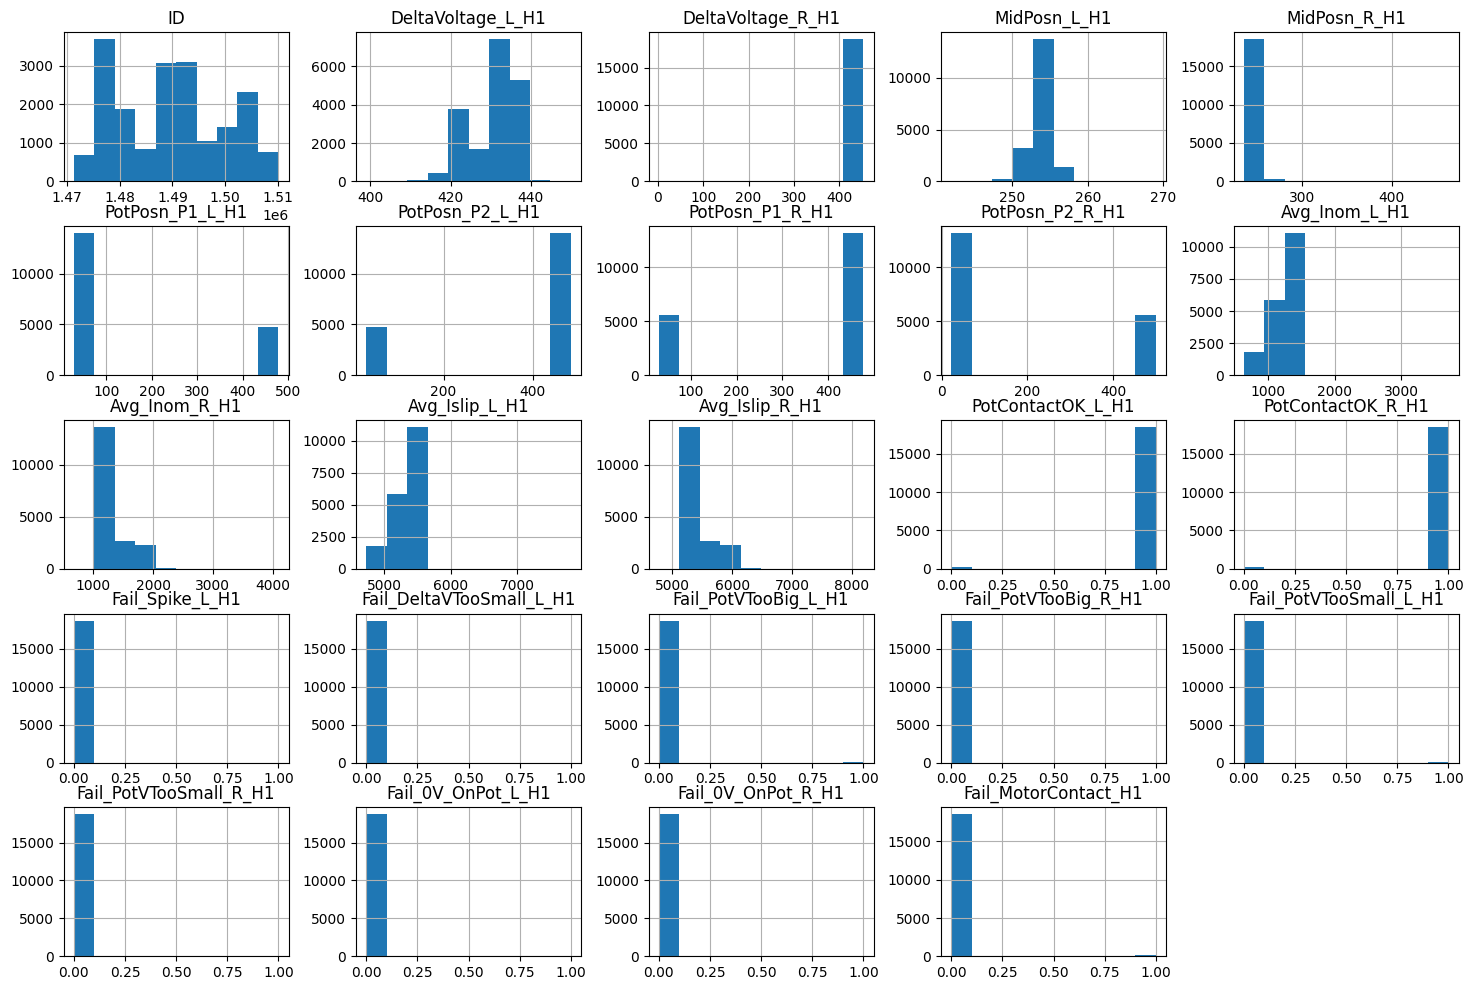

In [ ]:
#histogram

import matplotlib.pyplot as plt

Head_1.hist(figsize=(18,12))

plt.show()

MidPosn_L_H1 graph shows close to a normal distribution curve.  The other measurement features did not show a normal distribution and the other features are boolean and showing distribution as expected.

We will try boxplot graphs for this dataframe.

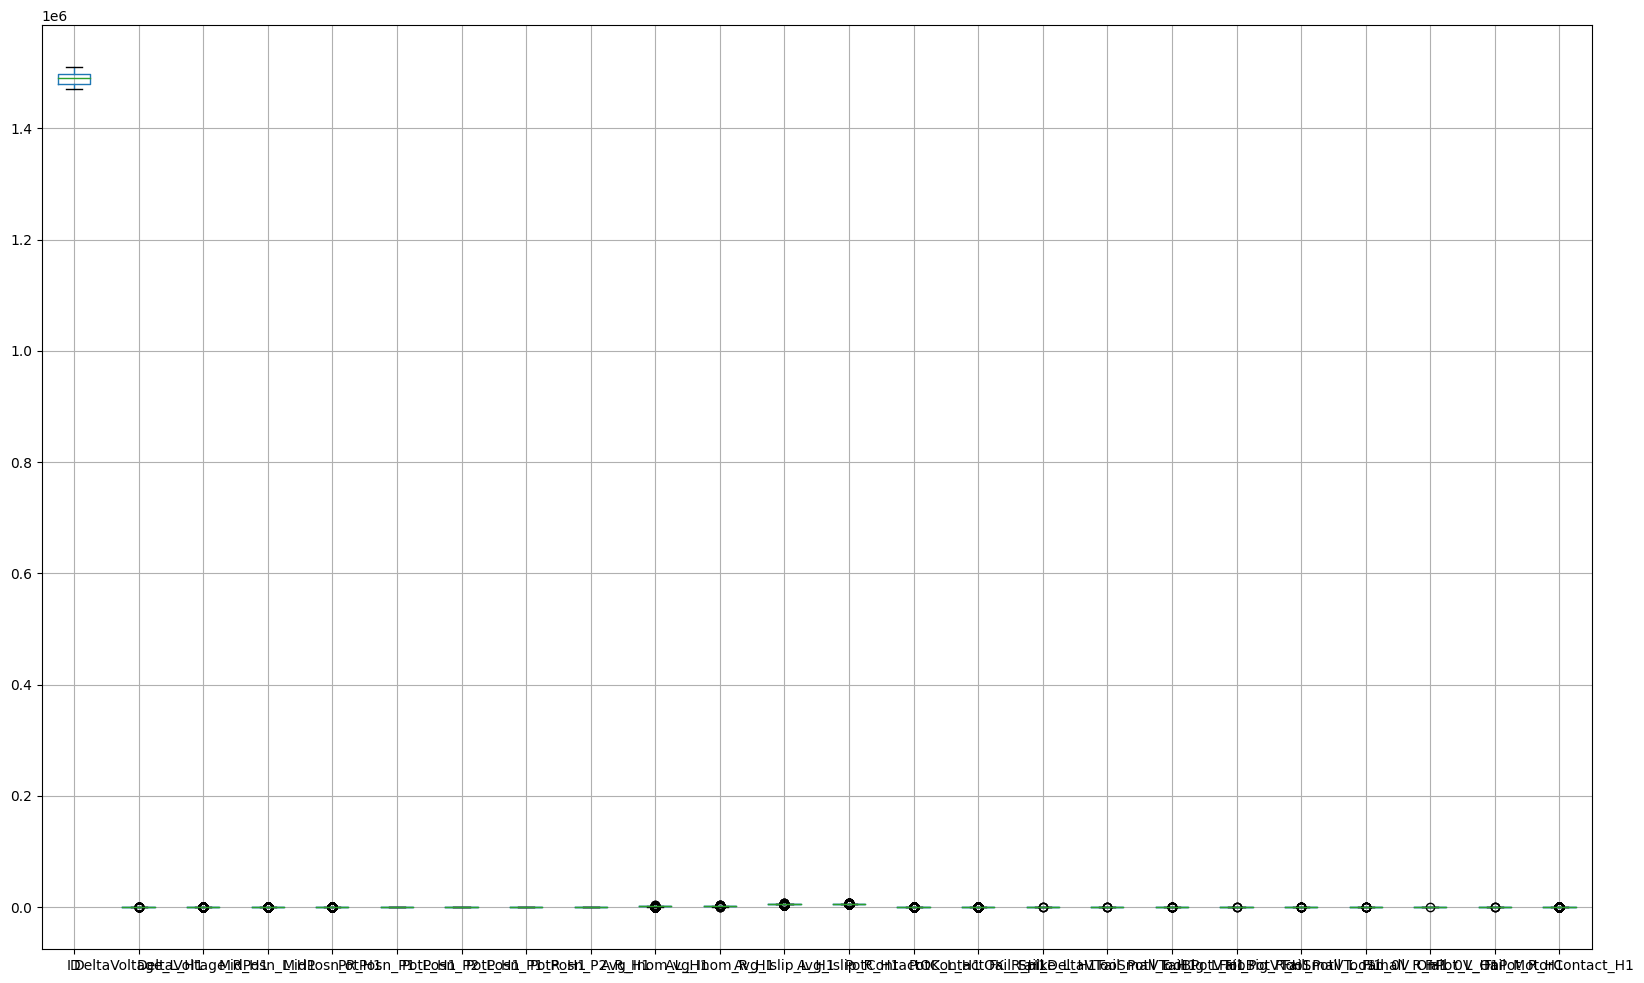

In [ ]:
Head_1.boxplot(figsize=(20,12))

plt.show()

Due to scaling there is no indication of pattern or trend within the boxplot graph.

We will try the correlation matrix now.

In [ ]:
#correlation analysis

correlation_matrix = Head_1.corr()

#Display the results

correlation_matrix

,ID,DeltaVoltage_L_H1,DeltaVoltage_R_H1,MidPosn_L_H1,MidPosn_R_H1,PotPosn_P1_L_H1,PotPosn_P2_L_H1,PotPosn_P1_R_H1,PotPosn_P2_R_H1,Avg_Inom_L_H1,...,PotContactOK_R_H1,Fail_Spike_L_H1,Fail_DeltaVTooSmall_L_H1,Fail_PotVTooBig_L_H1,Fail_PotVTooBig_R_H1,Fail_PotVTooSmall_L_H1,Fail_PotVTooSmall_R_H1,Fail_0V_OnPot_L_H1,Fail_0V_OnPot_R_H1,Fail_MotorContact_H1
ID,1.000000,-0.284332,0.004570,-0.314065,0.257908,0.336380,-0.338893,-0.387667,0.387679,0.325307,...,-0.070440,0.013472,0.002010,0.001432,0.000360,0.008710,0.017184,0.013124,0.019133,0.076496
DeltaVoltage_L_H1,-0.284332,1.000000,0.705681,0.040064,-0.003477,-0.001921,0.003582,0.013770,-0.014283,0.387774,...,0.048881,-0.010718,-0.017388,-0.023284,-0.016001,-0.006181,0.002481,-0.010981,-0.024304,-0.047084
DeltaVoltage_R_H1,0.004570,0.705681,1.000000,-0.095060,-0.156971,0.151656,-0.151130,-0.116140,0.108743,0.343490,...,0.058866,-0.013296,-0.016513,-0.019845,-0.010619,-0.009794,-0.001912,-0.008835,-0.019320,-0.056525
MidPosn_L_H1,-0.314065,0.040064,-0.095060,1.000000,-0.485395,-0.686104,0.694338,0.628079,-0.628818,-0.303123,...,0.056639,-0.005360,-0.027395,-0.050410,-0.022311,-0.011999,-0.010820,0.003429,0.000290,-0.051647
MidPosn_R_H1,0.257908,-0.003477,-0.156971,-0.485395,1.000000,0.610512,-0.611537,-0.737288,0.750654,0.183715,...,-0.054165,0.000956,0.010200,0.033209,-0.007637,0.003735,-0.000347,-0.003582,0.002388,0.050763
PotPosn_P1_L_H1,0.336380,-0.001921,0.151656,-0.686104,0.610512,1.000000,-0.999932,-0.894869,0.893341,0.362522,...,-0.065274,0.002581,0.016850,0.059255,-0.007328,0.000668,0.007448,-0.004073,0.011945,0.060523
PotPosn_P2_L_H1,-0.338893,0.003582,-0.151130,0.694338,-0.611537,-0.999932,1.000000,0.894975,-0.893481,-0.363061,...,0.065369,-0.002619,-0.017106,-0.059351,0.006930,-0.000829,-0.007511,0.004105,-0.011786,-0.060597
PotPosn_P1_R_H1,-0.387667,0.013770,-0.116140,0.628079,-0.737288,-0.894869,0.894975,1.000000,-0.999797,-0.393925,...,0.081020,-0.001212,-0.014536,-0.052744,0.008074,-0.001159,-0.004869,0.004636,-0.010045,-0.077536
PotPosn_P2_R_H1,0.387679,-0.014283,0.108743,-0.628818,0.750654,0.893341,-0.893481,-0.999797,1.000000,0.390314,...,-0.080777,0.001219,0.014507,0.052529,-0.008112,0.001245,0.004742,-0.004623,0.009877,0.077269
Avg_Inom_L_H1,0.325307,0.387774,0.343490,-0.303123,0.183715,0.362522,-0.363061,-0.393925,0.390314,1.000000,...,-0.053338,0.007626,0.004087,0.018247,0.008500,0.011984,0.014990,0.002143,0.007563,0.052273


**PotContactOK_R_H1 analysis**

Create a new dataframe containing PotContactOK_R_H1 and all the measurement columns; DeltaVoltage_L_H1, DeltaVoltage_R_H1, MidPosn_L_H1, MidPosn_R_H1, PotPosn_P1_L_H1, PotPosn_P2_L_H1, PotPosn_P1_R_H1, PotPosn_P2_R_H1

In [ ]:
#PotContactOK_R_H1 dataframe

df_PCOK_R_H1 = Head_1.filter(['PotContactOK_R_H1', 'DeltaVoltage_L_H1', 'DeltaVoltage_R_H1', 'MidPosn_L_H1', 'MidPosn_R_H1', 'PotPson_P1_L_H1', 'PotPosn_P2_L_H1', 'PotPson_P1_R_H1', 'PotPson_P2_R_H1'])

print(df_PCOK_R_H1)

       PotContactOK_R_H1  DeltaVoltage_L_H1  DeltaVoltage_R_H1  MidPosn_L_H1  \
0                      1                435                436           254   
1                      1                407                404           250   
2                      1                437                409           251   
3                      1                404                404           252   
4                      1                420                422           253   
...                  ...                ...                ...           ...   
18722                  1                435                435           253   
18723                  1                430                427           254   
18724                  1                434                432           253   
18725                  1                426                434           254   
18726                  1                437                431           252   

       MidPosn_R_H1  PotPosn_P2_L_H1  


Create a histogram for the dataframe

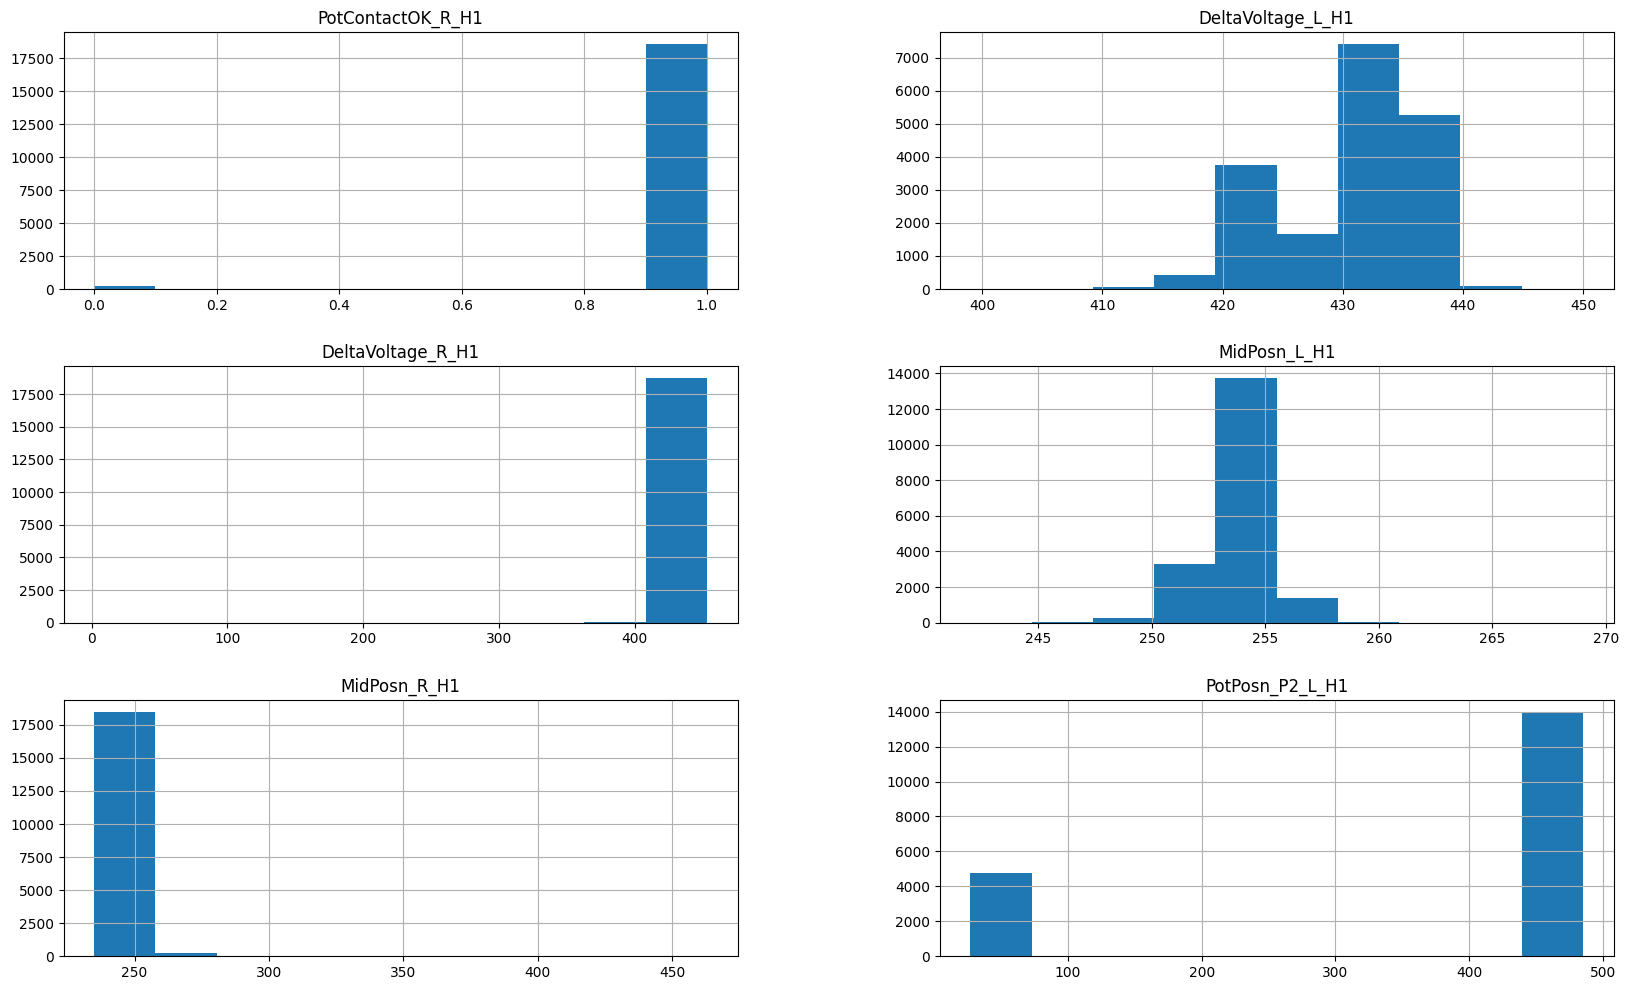

In [ ]:
df_PCOK_R_H1.hist(figsize=(20,12))

plt.show()

Create a boxplot of the dataframe

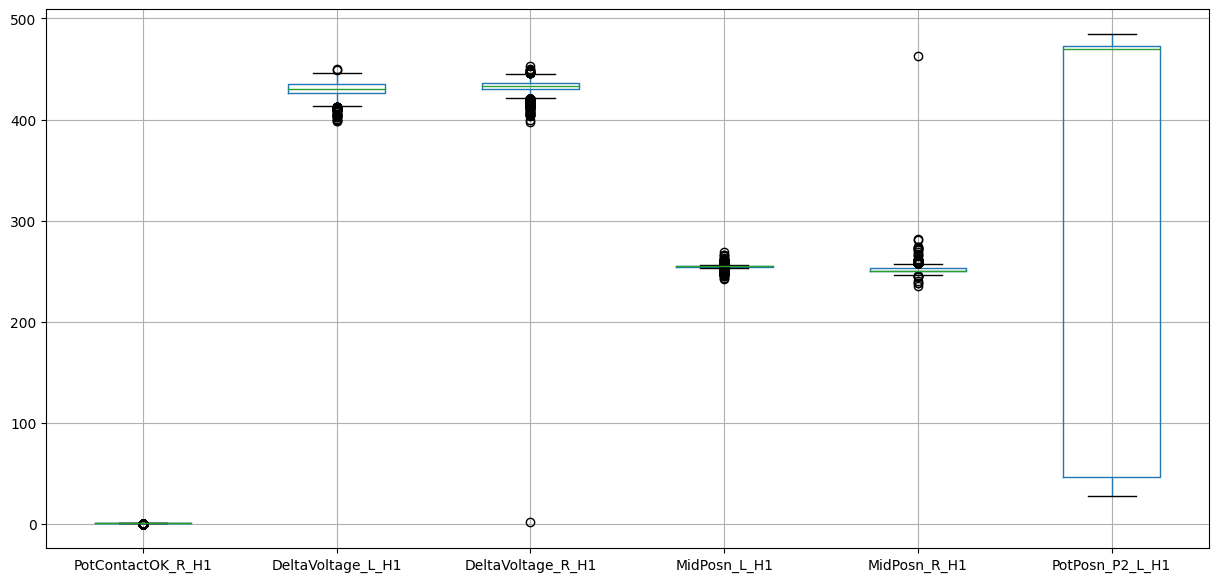

In [ ]:
df_PCOK_R_H1.boxplot(figsize=(15,7))

plt.show()

The correlation matrix for this dataframe is next to be created

In [ ]:
#correlation analysis

correlation_matrix = df_PCOK_R_H1.corr()

#Display the results

correlation_matrix

,PotContactOK_R_H1,DeltaVoltage_L_H1,DeltaVoltage_R_H1,MidPosn_L_H1,MidPosn_R_H1,PotPosn_P2_L_H1
PotContactOK_R_H1,1.000000,0.048881,0.058866,0.056639,-0.054165,0.065369
DeltaVoltage_L_H1,0.048881,1.000000,0.705681,0.040064,-0.003477,0.003582
DeltaVoltage_R_H1,0.058866,0.705681,1.000000,-0.095060,-0.156971,-0.151130
MidPosn_L_H1,0.056639,0.040064,-0.095060,1.000000,-0.485395,0.694338
MidPosn_R_H1,-0.054165,-0.003477,-0.156971,-0.485395,1.000000,-0.611537
PotPosn_P2_L_H1,0.065369,0.003582,-0.151130,0.694338,-0.611537,1.000000


No strong correlation positive or negative for the boolean value and the measurement features